# BENCHMARKING
## MODELING
Model *benchmarking* menggunakan model fasilitas pengayaan seperti pada Shugart dan King (2017). Model ini terdiri dari 1 MBA dengan 1 saluran masuk dan 2 saluran keluar. Jumlah aliran massa dari tiap saluran adalah sebagai berikut
1. Masukan: 10.0578 kg/hari
2. Tail: 3.1341 kg/hari
3. Luaran: 6.9237 kg/hari

In [2]:
# import modules
from sga import *

In [4]:
# uncertainty
sigma_sd    = 0.
sigma_so    = 0.
sigma_r     = 0.

# time
N           = 1000
N_t         = 365
dt          = 1
t_cal       = 30

In [8]:
# mass
mass1   = 10.0578 * dt
mass2   = -3.1341 * dt
mass3   = -6.9237 * dt
# measurement
meas1   = IKMP(mass1, sigma_sd, sigma_so, sigma_r, t_cal)
meas2   = IKMP(mass2, sigma_sd, sigma_so, sigma_r, t_cal)
meas3   = IKMP(mass3, sigma_sd, sigma_so, sigma_r, t_cal)
# MBA
mba     = MBA([meas1, meas2, meas3])

## MUF terhadap $\sigma$

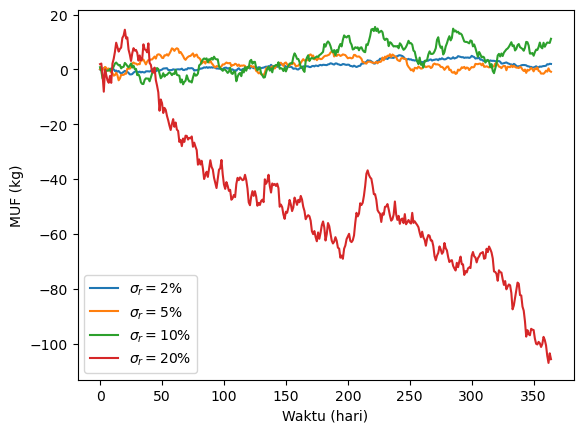

In [7]:
# MUF measurement
# variasi sigma_r
MUFs_r  = []
for sigma_r in [0.02, 0.05, 0.1, 0.2]:
    # ganti sigma
    for meas in mba.IKMPs:
        meas.sigma_sd   = 0.
        meas.sigma_so   = 0.
        meas.sigma_r    = sigma_r
    # hitung MUF
    mba.reset()
    MUFs    = MUF_over_t(mba, N_t, dt)
    MUFs_r.append(MUFs)
# plot
fig, ax     = plt.subplots()
ax.plot(range(N_t), MUFs_r[0], label = r'$\sigma_r = 2\%$')
ax.plot(range(N_t), MUFs_r[1], label = r'$\sigma_r = 5\%$')
ax.plot(range(N_t), MUFs_r[2], label = r'$\sigma_r = 10\%$')
ax.plot(range(N_t), MUFs_r[3], label = r'$\sigma_r = 20\%$')
ax.set_xlabel('Waktu (hari)')
ax.set_ylabel('MUF (kg)')
ax.legend(loc = 'best')
plt.savefig('figures/benchmark_muf_sigma_r.png', dpi = 300)


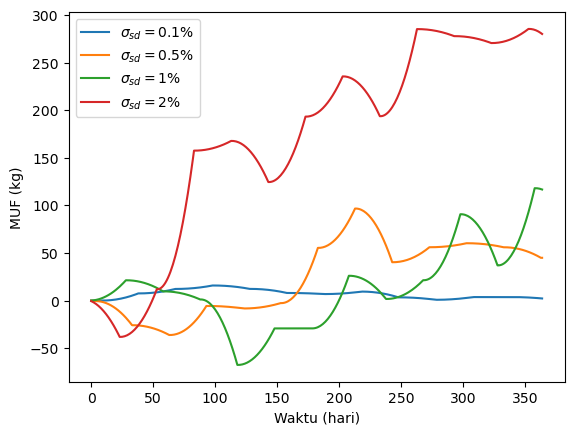

In [8]:
# variasi sigma_sd
MUFs_sd  = []
for sigma_sd in [0.001, 0.005, 0.01, 0.02]:
    # ganti sigma
    for meas in mba.IKMPs:
        meas.sigma_sd   = sigma_sd
        meas.sigma_so   = 0.
        meas.sigma_r    = 0.
    # hitung MUF
    mba.reset()
    MUFs    = MUF_over_t(mba, N_t, dt)
    MUFs_sd.append(MUFs)
# plot
fig, ax     = plt.subplots()
ax.plot(range(N_t), MUFs_sd[0], label = r'$\sigma_{sd} = 0.1\%$')
ax.plot(range(N_t), MUFs_sd[1], label = r'$\sigma_{sd} = 0.5\%$')
ax.plot(range(N_t), MUFs_sd[2], label = r'$\sigma_{sd} = 1\%$')
ax.plot(range(N_t), MUFs_sd[3], label = r'$\sigma_{sd} = 2\%$')
ax.set_xlabel('Waktu (hari)')
ax.set_ylabel('MUF (kg)')
ax.legend(loc = 'best')
plt.savefig('figures/benchmark_muf_sigma_sd.png', dpi = 300)

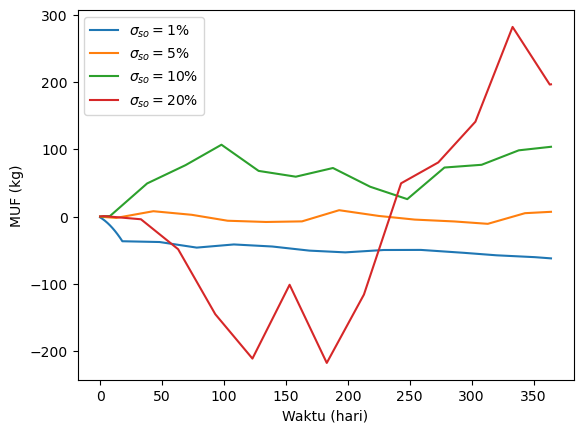

In [9]:
# variasi sigma_sd
MUFs_so  = []
for sigma_so in [0.01, 0.05, 0.1, 0.2]:
    # ganti sigma
    for meas in mba.IKMPs:
        meas.sigma_sd   = 0.
        meas.sigma_so   = sigma_so
        meas.sigma_r    = 0.
    # hitung MUF
    mba.reset()
    MUFs    = MUF_over_t(mba, N_t, dt)
    MUFs_so.append(MUFs)
# plot
fig, ax     = plt.subplots()
ax.plot(range(N_t), MUFs_so[0], label = r'$\sigma_{so} = 1\%$')
ax.plot(range(N_t), MUFs_so[1], label = r'$\sigma_{so} = 5\%$')
ax.plot(range(N_t), MUFs_so[2], label = r'$\sigma_{so} = 10\%$')
ax.plot(range(N_t), MUFs_so[3], label = r'$\sigma_{so} = 20\%$')
ax.set_xlabel('Waktu (hari)')
ax.set_ylabel('MUF (kg)')
ax.legend(loc = 'best')
plt.savefig('figures/benchmark_muf_sigma_so.png', dpi = 300)

## Persentase Error Tipe I
Error tipe I terjadi apabila sistem mendeteksi penyalahgunaan meski sebenarnya tidak ada penyalahgunaan tersebut. Suatu pengukuran dalam model ini disebut error tipe I apabila jumlah MUF mencapai SQ dalam waktu operasi (365 hari), meski seperti kita ketahui dari model, tidak ada aliran proliferasi.

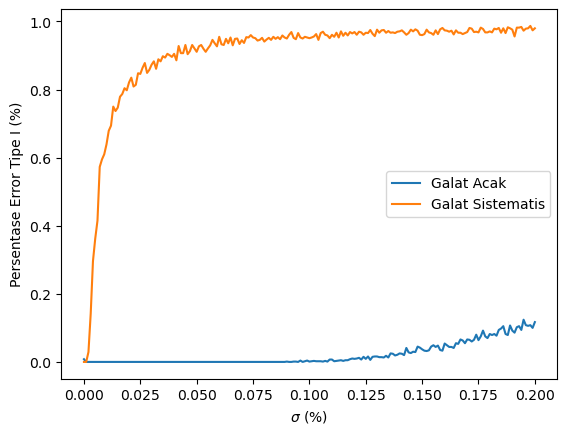

In [22]:
# detector measurement
# update mass
meas1.mass  = mass1
# random
ratios_r    = []
sigmas_r    = np.arange(0., 0.201, 0.001)
for sigma_r in sigmas_r:
    # change sigma_r
    print(sigma_r, end = '\r', flush = True)
    for meas in mba.IKMPs:
        meas.sigma_sd   = 0.
        meas.sigma_so   = 0.
        meas.sigma_r    = sigma_r
    # monte carlo
    ratio   = percent_of_detected(mba, N, N_t, dt)
    ratios_r.append(ratio)

# systematic
ratios_s    = []
sigmas_so   = np.arange(0., 0.201, 0.001)
for sigma_so in sigmas_so:
    # change sigma_sd
    print(sigma_so, end = '\r', flush = True)
    for meas in mba.IKMPs:
        meas.sigma_sd   = sigma_so / 10
        meas.sigma_so   = sigma_so
        meas.sigma_r    = 0.
    # monte carlo
    ratio   = percent_of_detected(mba, N, N_t, dt)
    ratios_s.append(ratio)

# plot
fig, ax     = plt.subplots()
ax.plot(sigmas_r, ratios_r, label = 'Galat Acak')
ax.plot(sigmas_so, ratios_s, label = 'Galat Sistematis')
ax.set_xlabel(r'$\sigma$ (%)')
ax.set_ylabel('Persentase Error Tipe I (%)')
ax.legend(loc = 'best')
plt.savefig('figures/benchmark_error_type_1.png', dpi = 300)

## Persentase Error Tipe II
Error tipe II terjadi apabila sistem tidak mendeteksi penyalahgunaan padahal sebenarnya ada saluran penyalahgunaan. Untuk hal ini, aliran massa ditambah dengan nilai 1SQ selama satu tahun. Apabila sistem tidak mendeteksi SQ, maka akan disebut sebagai error tipe II

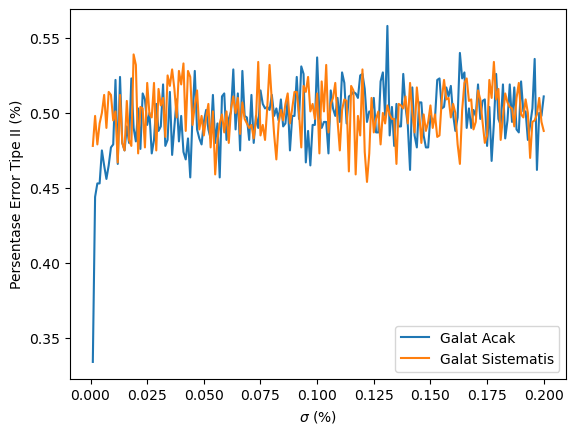

In [21]:
# detector measurement
# update model
meas1.mass  = mass1 + (SQ_LEU + 0.1)/365
# random
ratios_r    = []
sigmas_r    = np.arange(0.001, 0.201, 0.001)
for sigma_r in sigmas_r:
    # change sigma_r
    print(sigma_r, end = '\r', flush = True)
    for meas in mba.IKMPs:
        meas.sigma_sd   = 0.
        meas.sigma_so   = 0.
        meas.sigma_r    = sigma_r
    # monte carlo
    ratio   = 1 - percent_of_final_detected(mba, N, N_t, dt)
    ratios_r.append(ratio)

# systematic
ratios_s    = []
sigmas_so   = np.arange(0.001, 0.201, 0.001)
for sigma_so in sigmas_so:
    # change sigma_sd
    print(sigma_so, end = '\r', flush = True)
    for meas in mba.IKMPs:
        meas.sigma_sd   = sigma_so
        meas.sigma_so   = sigma_so
        meas.sigma_r    = 0.
    # monte carlo
    ratio   = 1 - percent_of_final_detected(mba, N, N_t, dt)
    ratios_s.append(ratio)

# plot
fig, ax     = plt.subplots()
ax.plot(sigmas_r, ratios_r, label = 'Galat Acak')
ax.plot(sigmas_so, ratios_s, label = 'Galat Sistematis')
ax.set_xlabel(r'$\sigma$ (%)')
ax.set_ylabel('Persentase Error Tipe II (%)')
ax.legend(loc = 'best')
plt.savefig('figures/benchmark_error_type_2.png', dpi = 300)

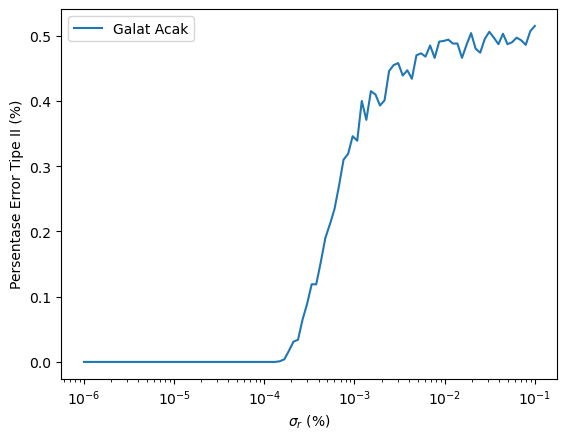

In [11]:
# detector measurement
# update model
meas1.mass  = mass1 + (SQ_LEU + 0.1)/365
# random
ratios_r    = []
sigmas_r    = np.logspace(np.log10(1e-6), np.log10(1e-1), 100)
for sigma_r in sigmas_r:
    # change sigma_r
    print(sigma_r, end = '\r', flush = True)
    for meas in mba.IKMPs:
        meas.sigma_sd   = 0.
        meas.sigma_so   = 0.
        meas.sigma_r    = sigma_r
    # monte carlo
    ratio   = 1 - percent_of_final_detected(mba, N, N_t, dt)
    ratios_r.append(ratio)

# plot
fig, ax     = plt.subplots()
ax.plot(sigmas_r, ratios_r, label = 'Galat Acak')
ax.set_xlabel(r'$\sigma_r$ (%)')
ax.set_ylabel('Persentase Error Tipe II (%)')
ax.set_xscale('log')
ax.legend(loc = 'best')
plt.savefig('figures/benchmark_error_type_2_random_log.png', dpi = 300)